In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

iris = np.genfromtxt("./data/iris_1D.csv", dtype=None, delimiter=",", skip_header=1)

x_data = iris[:, 0]
y_data = iris[:, 1]

In [2]:
def sigmoid_function(z):
    return 1 / (1 + math.exp(-z))


def loss_function(y_hat, y):
    return -(y * math.log(y_hat) + (1 - y) * math.log(1 - y_hat))


def predict(x, w, b):
    z = w * x + b
    print("z = ", z)
    y_hat = sigmoid_function(z)

    return y_hat


def compute_gradient(x, y_hat, y):
    db = y_hat - y
    dw = x * (y_hat - y)

    return dw, db


def update(b, w, lr, db, dw):
    b = b - lr * db
    w = w - lr * dw

    return b, w

In [ ]:
lr = 0.01
num_epochs = 1

w = -0.1
b = 0.1

for _ in range(num_epochs):
    for i in range(6):
        x = x_data[i]
        y = y_data[i]

        print("x, y:", x, " ", y)

        y_hat = predict(x, b, w)
        print(f"y_hat : {y_hat}")

        loss = loss_function(y_hat, y)
        print(f"loss : {loss}")

        db, dw = compute_gradient(x, y_hat, y)
        print(f"db, dw: {db}, {dw}")

        b, w = update(b, w, lr, db, dw)
        print(f"b, w: {b}, {w}")

        break


x, y: 1.4   0.0
z =  0.03999999999999998
y_hat : 0.5099986668799655
loss : 0.7133471672280342
db, dw: 0.7139981336319517, 0.5099986668799655
b, w: 0.09286001866368049, -0.10509998666879966


In [ ]:
def sigmoid_function_bce(z):
    return 1 / (1 + np.exp(-z))


def predict_bce(X, theta):
    return sigmoid_function_bce(np.dot(X, theta))


def compute_gradient_bce(x, y_hat, y):
    return x * (y_hat - y)


In [ ]:
X = iris[:, :1]
y = iris[:, 1]
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)
N = 6
lr = 0.01
num_iter = 5000

theta = np.array([0.01, -0.01])

losses = []
accs = []

for _ in range(num_iter):
    # for each sample
    for i in range(N):
        # get a sample
        xi = X[i]
        yi = y[i]

        # predict z
        y_hat = predict_bce(xi, theta)

        # compute loss
        loss = loss_function(y_hat, yi)

        # compute gradient and update
        gradient = compute_gradient_bce(xi, y_hat, yi)
        theta -= lr * gradient

        # for debug
        losses.append(loss)

    # accuracy for training
    preds = predict_bce(X, theta).round()
    acc = (preds == y).mean()
    accs.append(acc)

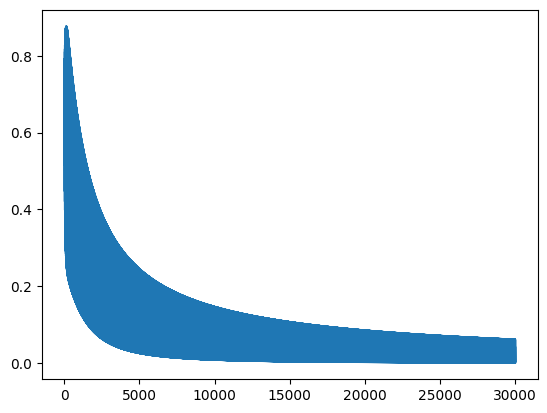

In [19]:
plt.plot(losses)
plt.show()

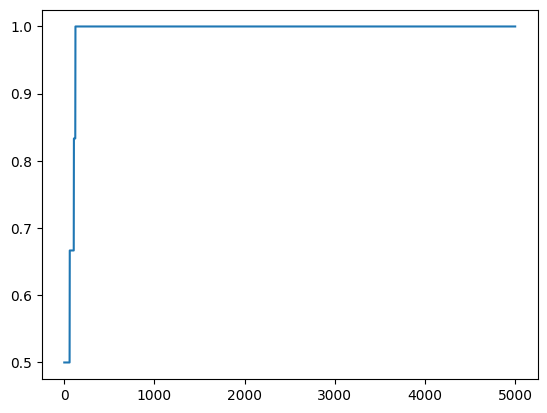

In [20]:
plt.plot(accs)
plt.show()